In [6]:
import numpy as np # for numerical operations
from tic_tac_toe import Tic_Tac_Toe # load game class
from tic_tac_toe import Random_Player, Preventive_Player # load too implemented Tic Tac Toe Players
from RL_agent import RL_agent # Load RL-agent class
import pickle # for storing the agent for later use
import torch # for reproducability (RL-agent employs this package)

In [7]:
Game = Tic_Tac_Toe(print_board=False)
Game.run(Random_Player(),Preventive_Player())
winner = Game.winner

In [12]:
def test_games(agent, opponent,n_test_games=100):
        
    # run test games
    games_won = 0
    games_lost = 0
    
    # agent begins
    for n in range(n_test_games):
        # Create and run game
        Game = Tic_Tac_Toe(print_board=False)
        Game.run(agent,opponent)
        winner = Game.winner
        if winner==0:
            games_won += 1
        if winner==1:
            games_lost += 1

    print('Generation',i+1,'\tGames won:',games_won,'\tGames lost:',games_lost)
    return games_won, games_lost

In [23]:
seed = 100
np.random.seed(seed) # for reproduction
torch.manual_seed(seed) # for reproduction

# Create agent
architecture = [9,100,1] # 9 input features, 100 hidden nodes, always one output
n_actions = 9 # Number of actions available
agent = RL_agent(architecture,
                 n_actions,
                 expl_rate=0.05,
                 memory_size=1000*9, # at most 2000 matches
                 batch_size=32)

In [10]:
# run 10 training generations
for i in range(10):
    
    # PERFORMANCE EVALUATION
    agent.evaluation_mode() # Put agent into evaluation mode
    test_games(agent,Random_Player()) # test agents performance
    
    agent.training_mode() # Put agent into training mode
    
    # Create sparring partner
    sparring_partner = Random_Player()
    
    # RUN TRAINING GAMES
    for j in range(100):
        
        # RUN GAME
        Game = Tic_Tac_Toe(print_board=False)
        Game.run(agent,sparring_partner)
        winner = Game.winner
        
        # ASSIGN PAYOFFS    
        if winner==0: # if RL-agent is winner
            payoffs = np.zeros(Game.player_turns[0])
            payoffs[-1] = 1 # the last turn led to victory
            agent.assign_payoffs(payoffs)        
        
        if winner==1: # if opponent is winner
            payoffs = np.zeros(Game.player_turns[0])
            payoffs[-1] = -1 # the last turn led to defeat
            agent.assign_payoffs(payoffs)
            
        if winner==None: # draw
            payoffs = np.zeros(Game.player_turns[0])
            agent.assign_payoffs(payoffs)
            
    # ADAPT AGENT   
    agent.train()

Generation 1 	Games won: 74 	Games lost: 21
Generation 2 	Games won: 75 	Games lost: 15
Generation 3 	Games won: 73 	Games lost: 18
Generation 4 	Games won: 86 	Games lost: 8
Generation 5 	Games won: 85 	Games lost: 11
Generation 6 	Games won: 89 	Games lost: 7
Generation 7 	Games won: 92 	Games lost: 4
Generation 8 	Games won: 86 	Games lost: 5
Generation 9 	Games won: 89 	Games lost: 4
Generation 10 	Games won: 94 	Games lost: 6


In [24]:
random_won = []
random_lost = []
preventive_won = []
preventive_lost = []

In [25]:
# run 20 training generations
for i in range(20):
    
    # PERFORMANCE EVALUATION
    agent.evaluation_mode() # Put agent into evaluation mode
    won, lost = test_games(agent,Random_Player()) # test agents performance
    random_won.append(won)
    random_lost.append(lost)
    won, lost = test_games(agent,Preventive_Player()) # test agents performance
    preventive_won.append(won)
    preventive_lost.append(lost)
    
    agent.training_mode() # Put agent into training mode
    
    # Create sparring partner
    sparring_partner = Random_Player()
    
    # RUN TRAINING GAMES
    for j in range(100):
        
        # RUN GAME
        Game = Tic_Tac_Toe(print_board=False)
        Game.run(agent,sparring_partner)
        winner = Game.winner
        
        # ASSIGN PAYOFFS    
        if winner==0: # if RL-agent is winner
            payoffs = np.zeros(Game.player_turns[0])
            payoffs[-1] = 1 # the last turn led to victory
            agent.assign_payoffs(payoffs)        
        
        if winner==1: # if opponent is winner
            payoffs = np.zeros(Game.player_turns[0])
            payoffs[-1] = -1 # the last turn led to defeat
            agent.assign_payoffs(payoffs)
            
        if winner==None: # draw
            payoffs = np.zeros(Game.player_turns[0])
            agent.assign_payoffs(payoffs)
            
    # ADAPT AGENT   
    agent.train()

Generation 1 	Games won: 74 	Games lost: 18
Generation 1 	Games won: 18 	Games lost: 12
Generation 2 	Games won: 50 	Games lost: 44
Generation 2 	Games won: 20 	Games lost: 57
Generation 3 	Games won: 79 	Games lost: 19
Generation 3 	Games won: 12 	Games lost: 14
Generation 4 	Games won: 90 	Games lost: 10
Generation 4 	Games won: 36 	Games lost: 43
Generation 5 	Games won: 89 	Games lost: 8
Generation 5 	Games won: 23 	Games lost: 16
Generation 6 	Games won: 98 	Games lost: 2
Generation 6 	Games won: 44 	Games lost: 17
Generation 7 	Games won: 95 	Games lost: 5
Generation 7 	Games won: 49 	Games lost: 8
Generation 8 	Games won: 98 	Games lost: 0
Generation 8 	Games won: 48 	Games lost: 10
Generation 9 	Games won: 96 	Games lost: 4
Generation 9 	Games won: 32 	Games lost: 13
Generation 10 	Games won: 77 	Games lost: 15
Generation 10 	Games won: 16 	Games lost: 17
Generation 11 	Games won: 95 	Games lost: 4
Generation 11 	Games won: 41 	Games lost: 20
Generation 12 	Games won: 97 	Games

In [26]:
# run 20 training generations
for i in range(20):
    
    # PERFORMANCE EVALUATION
    agent.evaluation_mode() # Put agent into evaluation mode
    won, lost = test_games(agent,Random_Player()) # test agents performance
    random_won.append(won)
    random_lost.append(lost)
    won, lost = test_games(agent,Preventive_Player()) # test agents performance
    preventive_won.append(won)
    preventive_lost.append(lost)
    
    agent.training_mode() # Put agent into training mode
    
    # Create sparring partner
    sparring_partner = Preventive_Player()
    
    # RUN TRAINING GAMES
    for j in range(100):
        
        # RUN GAME
        Game = Tic_Tac_Toe(print_board=False)
        Game.run(agent,sparring_partner)
        winner = Game.winner
        
        # ASSIGN PAYOFFS    
        if winner==0: # if RL-agent is winner
            payoffs = np.zeros(Game.player_turns[0])
            payoffs[-1] = 1 # the last turn led to victory
            agent.assign_payoffs(payoffs)        
        
        if winner==1: # if opponent is winner
            payoffs = np.zeros(Game.player_turns[0])
            payoffs[-1] = -1 # the last turn led to defeat
            agent.assign_payoffs(payoffs)
            
        if winner==None: # draw
            payoffs = np.zeros(Game.player_turns[0])
            agent.assign_payoffs(payoffs)
            
    # ADAPT AGENT   
    agent.train()

Generation 1 	Games won: 95 	Games lost: 3
Generation 1 	Games won: 41 	Games lost: 12
Generation 2 	Games won: 99 	Games lost: 1
Generation 2 	Games won: 36 	Games lost: 3
Generation 3 	Games won: 98 	Games lost: 1
Generation 3 	Games won: 42 	Games lost: 13
Generation 4 	Games won: 99 	Games lost: 0
Generation 4 	Games won: 64 	Games lost: 11
Generation 5 	Games won: 96 	Games lost: 3
Generation 5 	Games won: 42 	Games lost: 19
Generation 6 	Games won: 91 	Games lost: 7
Generation 6 	Games won: 13 	Games lost: 74
Generation 7 	Games won: 98 	Games lost: 2
Generation 7 	Games won: 49 	Games lost: 28
Generation 8 	Games won: 95 	Games lost: 3
Generation 8 	Games won: 26 	Games lost: 10
Generation 9 	Games won: 97 	Games lost: 2
Generation 9 	Games won: 60 	Games lost: 18
Generation 10 	Games won: 82 	Games lost: 14
Generation 10 	Games won: 33 	Games lost: 31
Generation 11 	Games won: 98 	Games lost: 2
Generation 11 	Games won: 65 	Games lost: 14
Generation 12 	Games won: 97 	Games los

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

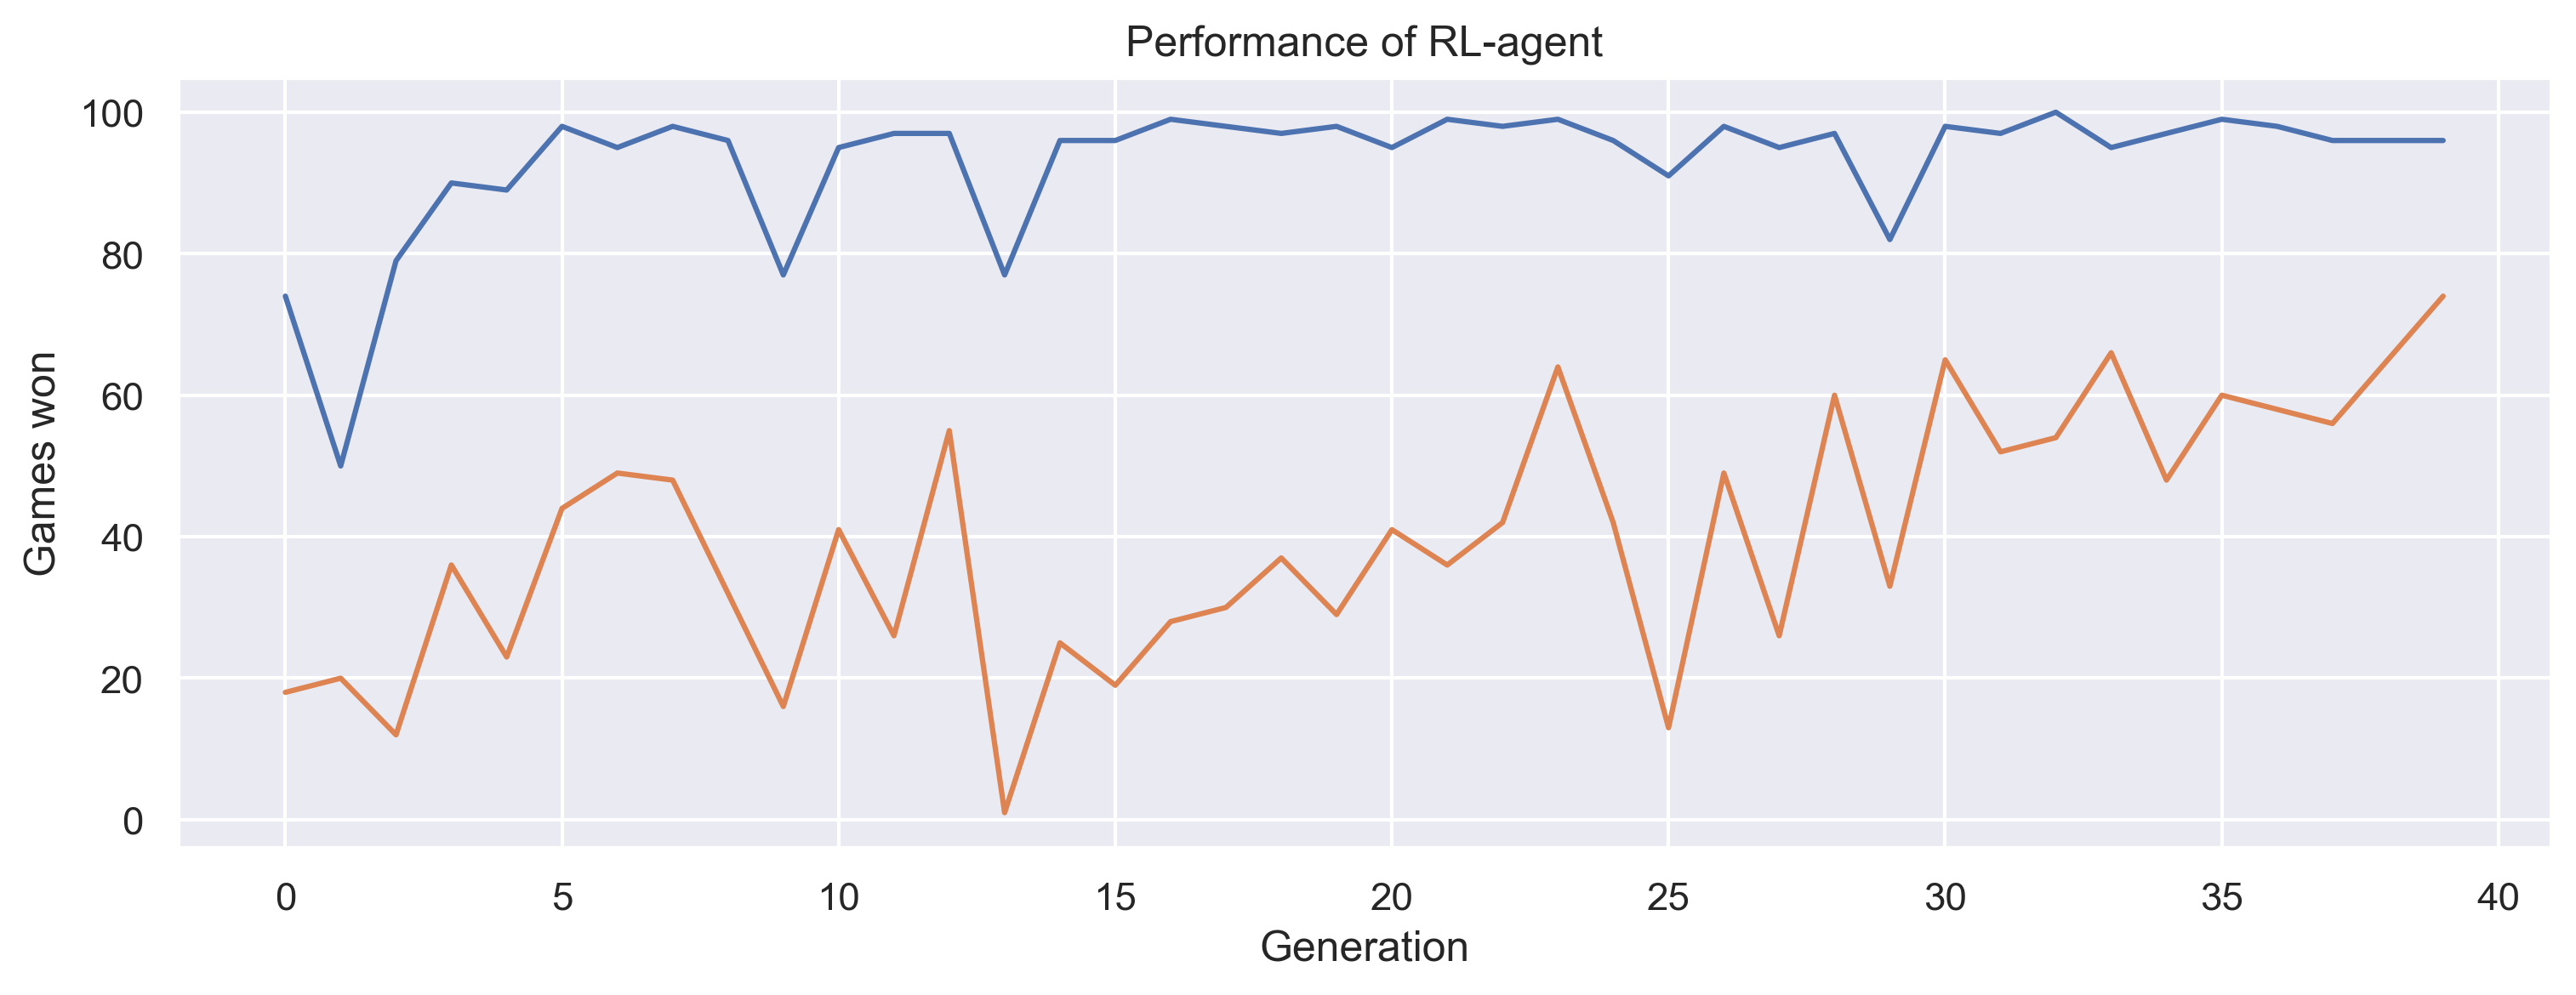

In [28]:
plt.figure(figsize=(12,4),dpi=300)
plt.plot(random_won,label='Random')
#plt.plot(random_lost)
plt.plot(preventive_won,label='Preventive')
plt.ylabel('Games won')
plt.xlabel('Generation')
plt.title('Performance of RL-agent')
#plt.plot(preventive_lost)
plt.show()